In [1]:
allure_etudier=2

In [2]:
import sys
sys.path.insert(0, "C:/projets_python/diabolo")
import warnings
warnings.filterwarnings("ignore")

In [3]:
from math import *

#LIBRAIRIES PERSO
import etude_variable.jouer as jj




# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform
from collections import Counter
#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier


#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0
Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


In [4]:
def load_mymodel(allure):
    from sklearn.externals import joblib
    print("Restauration modele ...")
    clf = joblib.load('diabolo' + str(allure) + '.pkl')
    return clf

    
load_mymodel(1)    

Restauration modele ...


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.04,
       max_delta_step=3, max_depth=14, max_features='sqrt',
       min_child_weight=6, missing=nan, n_estimators=1330, n_jobs=3,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=1e-05, reg_lambda=5.0, scale_pos_weight=1, seed=100,
       silent=False, subsample=1)

In [5]:

xnames =jj.get_names()
xnames2 = jj.get_names2()

# xnames 2 = nouvelles colonnes du fichier transformé
# p2018 a été ajouté, SELECTION a été ajouté

df2=jj.restauration(allure_etudier=allure_etudier,xnames2=xnames2)

print(df2.info())




2018-07-19 23:07:51.097122

 Time taken: 0 hours 0 minutes and 1.01 seconds.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 133918 entries, 103 to 489940
Data columns (total 53 columns):
CO_PRIX                      133918 non-null int64
HIPPO                        133918 non-null int64
IDCOURSE                     133918 non-null int64
IDPARTCIPANT                 133918 non-null int64
PAR_AGE                      133918 non-null int64
PAR_CARRIERE                 133918 non-null float64
PAR_CARRIERE_Q               133918 non-null float64
PAR_CLASSE_AGE               133918 non-null float64
PAR_COTEDER                  133918 non-null int64
PAR_ENT_ECART_GAGNANT        133918 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    133918 non-null float64
PAR_ENT_REU_PLACE            133918 non-null float64
PAR_ENT_REUSSITE_GAGNE       133918 non-null float64
PAR_ENT_VICTOIRE             133918 non-null float64
PAR_GAIN                     133918 non-null float64
pAR_JOC_ECART_GAGNANT        

In [6]:
#df2=jj.conversion(df2)  <<<<<<<<<<<<<<<<< INUTILE POUR LE MOMENT !!!!!!!!!!!!!!!!!!!
#df2 = jj.encodage(df2)

scalerise=0
#print(df2.head(2))

In [7]:





df2['SELECTION2']=df2['SELECTION2'].astype('float')
df2['SELECTION2']=df2['SELECTION2'].astype('int')
df2 = jj.suppression_colonne(df2=df2,allure=0)
df2 = jj.suppression_colonne(df2=df2,allure=allure_etudier)


#df2=df2[ ['SELECTION2','PAR_REUSSITE_3P','p2018','PAR_REUSSITE_GAGNE' ,'IDPARTCIPANT', 'IDCOURSE' ]]


Suppression colonnne  0
Suppression colonnne  2


In [8]:

# Creating bins for the win column
def assign_selection2(W):
    if W==1:
        return 1
    if W==0:
        return 0
    
    


Lib_features_df = df2.columns
xdata = df2.values

df_gagnant = pd.DataFrame(data=xdata, columns=Lib_features_df)


df_gagnant['SELECTION'] = df_gagnant['SELECTION2'].apply(assign_selection2)
df_gagnant.drop(["SELECTION2"], axis=1, inplace=True)

#index_col = ['IDPARTCIPANT', 'IDCOURSE']
#df_gagnant = df_gagnant.set_index(index_col)
df_gagnant_len = len(df_gagnant.columns) - 1
Lib_features = df_gagnant.columns[:df_gagnant_len]

feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<

print("DEFINITION DE LA STRUCTURE ---------------------------------------------------------")
print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES ",Lib_features)
print("(3) response column ",response_column)
# df_gagnant, feature_columns, response_column, ratio SONT DEFINI


DEFINITION DE LA STRUCTURE ---------------------------------------------------------
(1) Shape df_gagnant   (133918, 38) 

(2) FEATURES  Index(['HIPPO', 'IDCOURSE', 'IDPARTCIPANT', 'PAR_AGE', 'PAR_CARRIERE',
       'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE',
       'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE',
       'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_PLACE',
       'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE',
       'PAR_RUESSITE_PLACE', 'Nb_partant', 'PAR_PROPRIO', 'NOM_JOC',
       'NOM_ENTR', 'POIDS', 'CORDE', 'CHEVAL', 'PAR_ENT_ECART_PLACE',
       'PAR_VICTOIRE', 'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018'],
      dtype='object')
(3) response column  ['SELECTION']


In [9]:
y_col_glass = 'SELECTION'
x_cols_glass =list(df_gagnant.columns.values)
x_cols_glass.remove(y_col_glass)
print(x_cols_glass)

['HIPPO', 'IDCOURSE', 'IDPARTCIPANT', 'PAR_AGE', 'PAR_CARRIERE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_PLACE', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Nb_partant', 'PAR_PROPRIO', 'NOM_JOC', 'NOM_ENTR', 'POIDS', 'CORDE', 'CHEVAL', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE', 'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018']


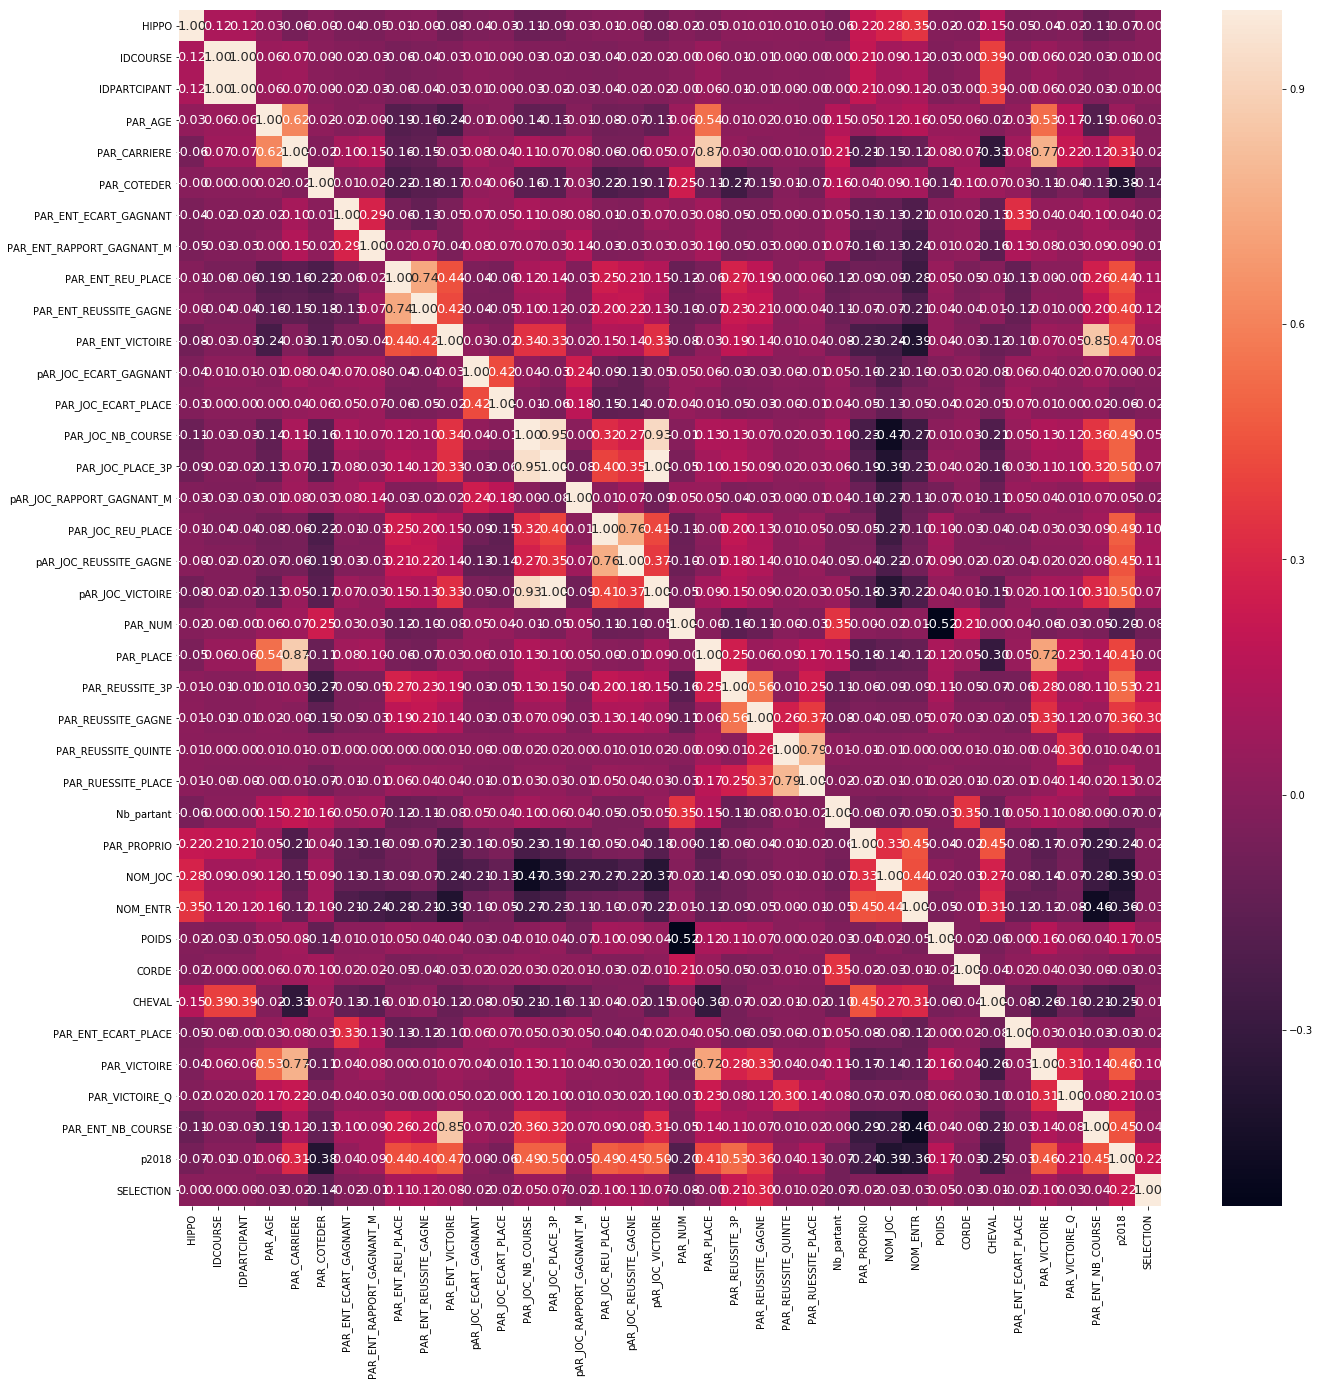

In [10]:

#Enfin, quelque chose de vraiment cool que vous pouvez mettre 
#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=.0, ax=ax, annot_kws={"size": 13}, xticklabels = 1 )








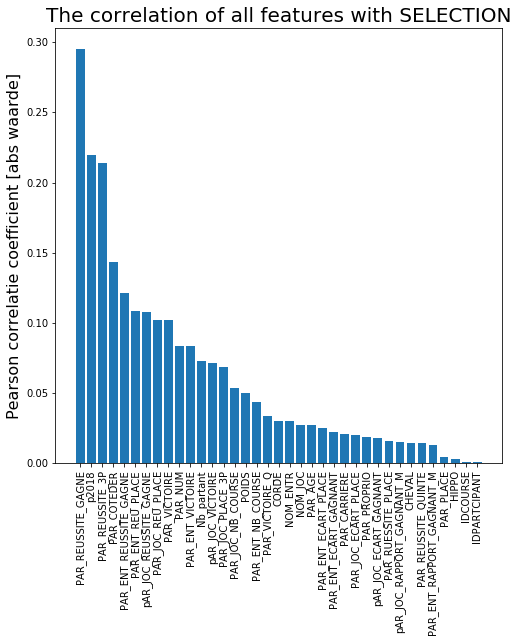

In [11]:
jj.display_corr_with_col(df_gagnant, 'SELECTION')

In [12]:
df_gagnant.describe()

,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,...,NOM_ENTR,POIDS,CORDE,CHEVAL,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,p2018,SELECTION
count,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,...,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000,133918.000000
mean,68.692065,32152.794090,397086.213900,4.557416,24.632544,19.678721,7.933661,7.872714,0.258323,0.082492,...,1651.162816,56.988067,6.758516,29300.067937,2.438059,2.495348,0.070961,168.134426,130.878637,0.087300
std,57.644004,14388.084021,178833.740898,1.840594,24.505432,22.834895,11.251442,6.805209,0.138284,0.068324,...,1835.063986,2.651570,3.938497,22114.370562,3.542692,2.968552,0.350744,191.473506,52.577132,0.282275
min,2.000000,1622.000000,19919.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,46.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,21636.000000,265526.000000,3.000000,6.000000,7.000000,0.000000,4.570000,0.180000,0.040000,...,304.000000,56.000000,3.000000,10789.000000,0.000000,0.000000,0.000000,26.000000,93.904568,0.000000
50%,57.000000,31781.000000,392459.500000,4.000000,17.000000,13.000000,4.000000,7.200000,0.250000,0.070000,...,974.000000,57.000000,6.000000,24457.500000,1.000000,1.000000,0.000000,96.000000,130.180951,0.000000
75%,86.000000,43191.000000,534742.750000,6.000000,36.000000,24.000000,11.000000,10.280000,0.340000,0.120000,...,2317.000000,58.000000,10.000000,43932.750000,3.000000,4.000000,0.000000,252.000000,166.713627,0.000000
max,286.000000,56502.000000,698877.000000,16.000000,194.000000,642.000000,94.000000,102.700000,1.000000,1.000000,...,9713.000000,79.000000,20.000000,82140.000000,54.000000,24.000000,10.000000,931.000000,340.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B891D3C3C8>,
      dtype=object)

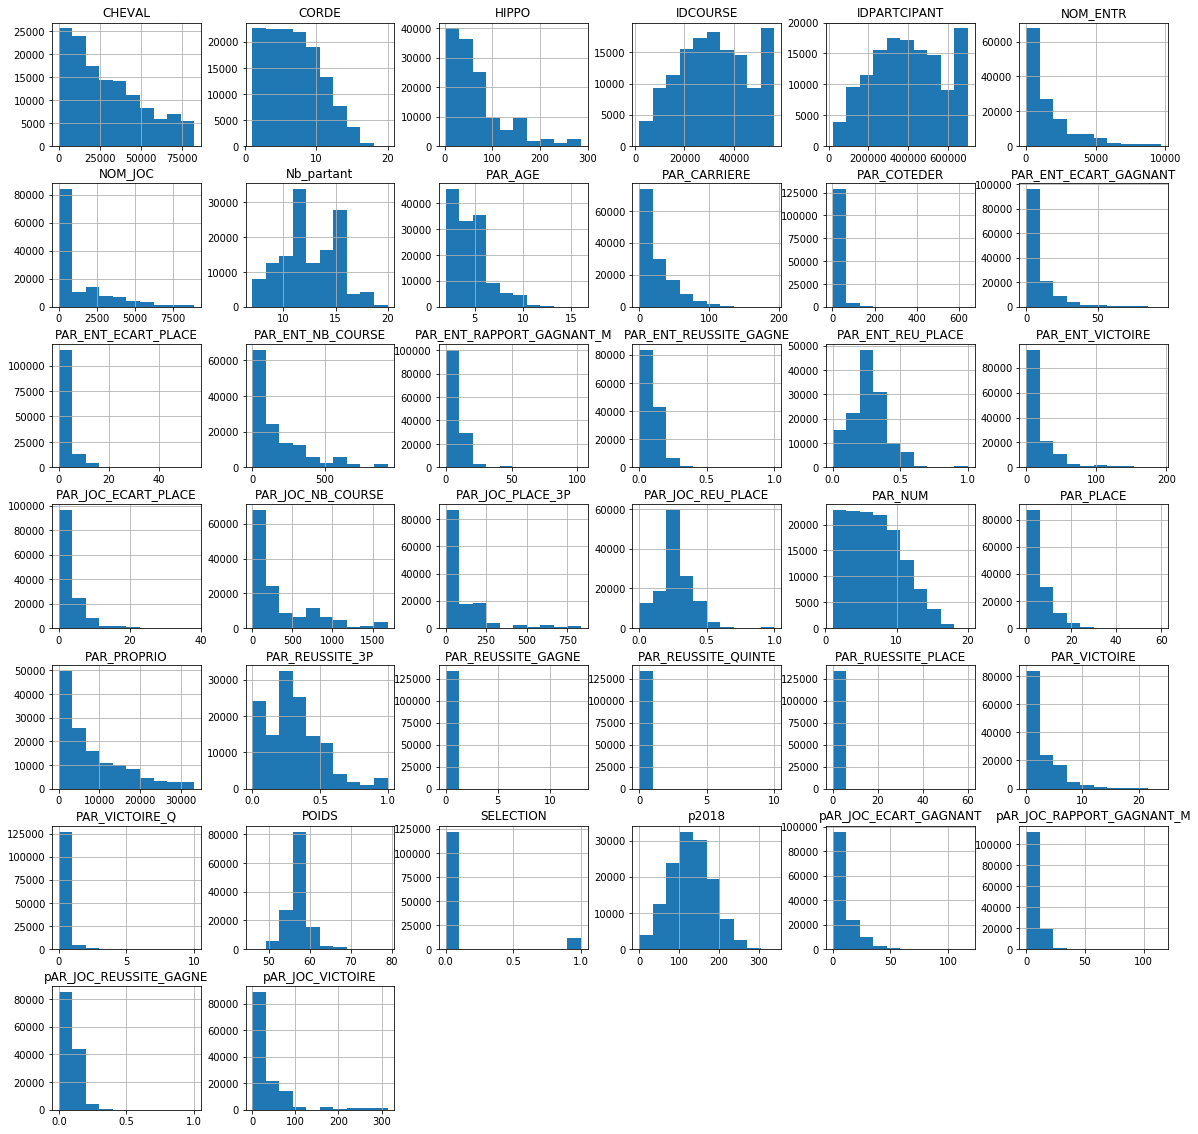

In [13]:
df_gagnant.hist( figsize = (20,20))


Proportion: 10.45 : 1
Total number of records : 133918 
Nombre de participations avec SELECTION = 0 : 122227
Nombre de participations avec SELECTION = 1  : 11691
Pourcentage 0: 91.2700%,  pourcentage 1 : 8.7300%


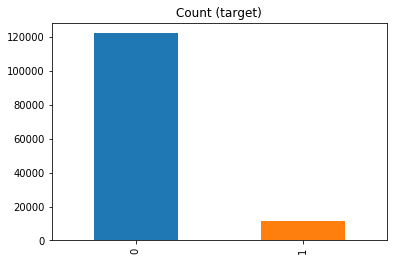

In [14]:

target_count = df_gagnant['SELECTION'].value_counts()

print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)')
normal_trans_perc = sum(df_gagnant['SELECTION'] == 0) / (sum(df_gagnant['SELECTION'] == 0) + sum(df_gagnant['SELECTION'] == 1))
fraud_trans_perc = 1 - normal_trans_perc
print('Total number of records : {} '.format(len(df_gagnant)))
print('Nombre de participations avec SELECTION = 0 : {}'.format(sum(df_gagnant['SELECTION'] == 0)))
print('Nombre de participations avec SELECTION = 1  : {}'.format(sum(df_gagnant['SELECTION'] == 1)))
print('Pourcentage 0: {:.4f}%,  pourcentage 1 : {:.4f}%'.format(normal_trans_perc * 100,fraud_trans_perc * 100))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B895E2BDA0>,
      dtype=object)

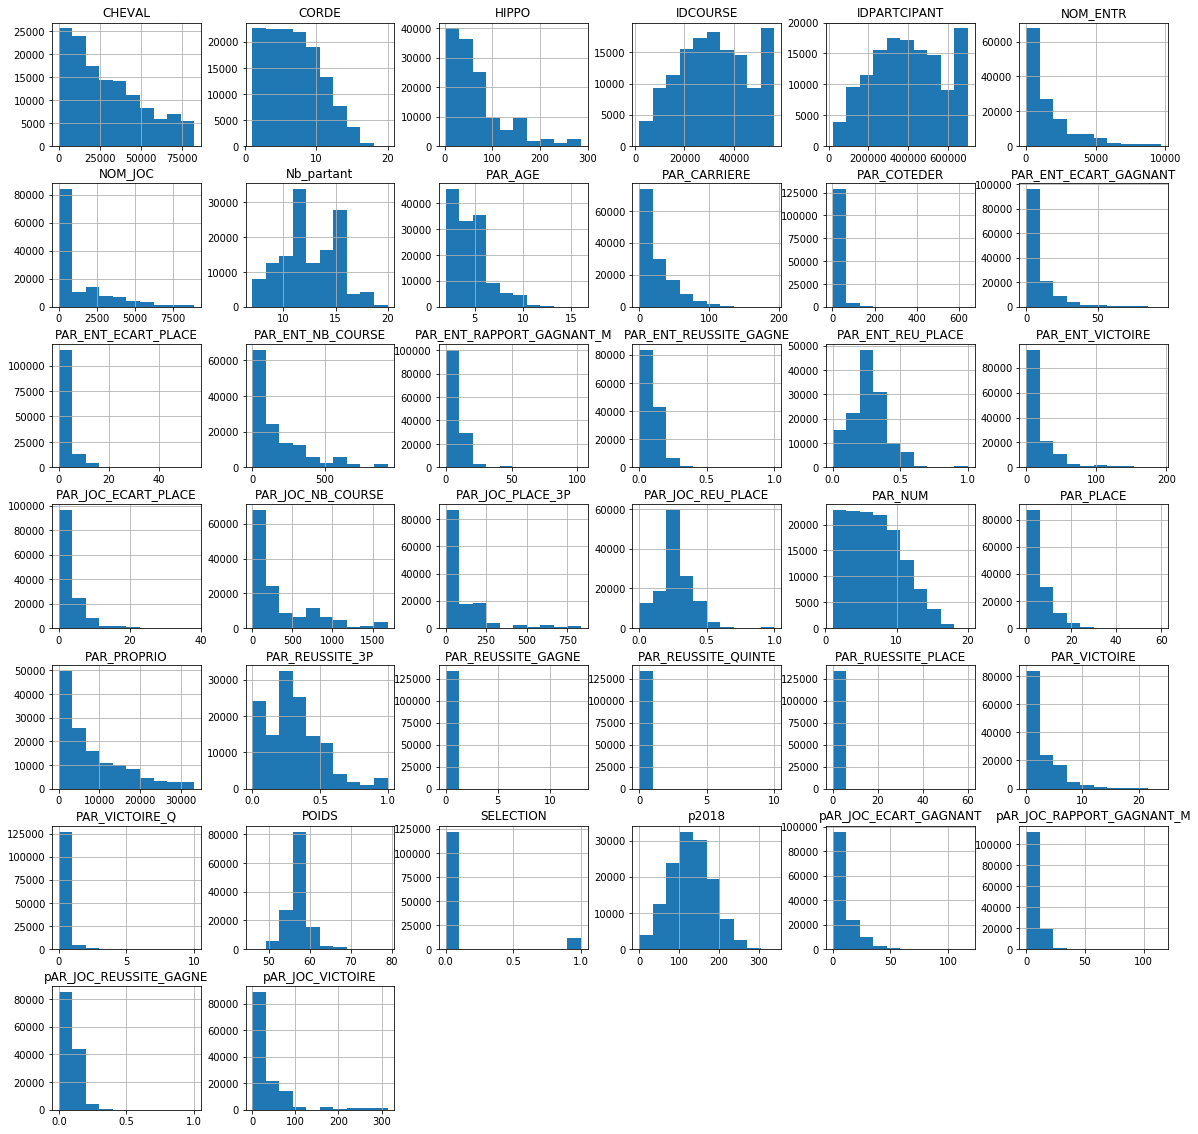

In [15]:
df_gagnant.hist( figsize = (20,20))

In [16]:

#train_x, test_x, train_y, test_y = jj.split_data2(df_gagnant, feature_columns,response_column)
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_gagnant[feature_columns],df_gagnant[response_column], test_size=0.30, random_state=42)

train_eval_X = df_gagnant[feature_columns]
train_eval_Y = df_gagnant[response_column]
print("SPLIT des données ....\n")

print("Train_x", train_x.shape)
print("Train y", train_y.shape)
print("")
print("Test x", test_x.shape)
print("Test y", test_y.shape)

#print("train_eval_X", train_eval_X.shape)
#print("train_eval_Y", train_eval_Y.shape)

#test_y = test_y['SELECTION'].ravel()
#train_y = train_y['SELECTION'].ravel()

#train_x, train_y = jj.smot2(train_x=train_x, train_y=train_y, feature_columns=feature_columns)

print("apres SMOT2")
print("Train_x", train_x.shape)
print("Train y", train_y.shape)
#test_x, test_y = smot2(train_x=test_x, train_y=test_y, feature_columns=feature_columns)


SPLIT des données ....

Train_x (93742, 37)
Train y (93742, 1)

Test x (40176, 37)
Test y (40176, 1)
apres SMOT2
Train_x (93742, 37)
Train y (93742, 1)


In [17]:
dic=jj.return_dict_classi()
dic

{'Decision Tree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'Gradient Boosting Classifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=1000,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False),
 'Linear SVM': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=

In [18]:

dict_models = jj.batch_classify(dic, train_x, train_y, test_x, test_y, no_classifiers = 9, verbose=True)
jj.display_dict_models(dict_models)

trained Logistic Regression in 3.02 s  0.9119711548718824 0.9144763042612505
trained Nearest Neighbors in 0.47 s  0.913165923492138 0.9094235364396654
trained Linear SVM in 5316.61 s  1.0 0.9144514137793708
trained Gradient Boosting Classifier in 133.97 s  0.9272791278189072 0.9169404619673437
trained Decision Tree in 2.99 s  1.0 0.8589705296694544
trained Random Forest in 289.95 s  1.0 0.9180854241338112
trained Neural Net in 4.46 s  0.9113737705617546 0.914152727996814
trained Naive Bayes in 0.07 s  0.834129845746837 0.8358721624850657
trained xgbclassifier in 11.46 s  0.9180410061658595 0.9181849860613301
                     classifier  train_score  test_score   train_time
8                 xgbclassifier     0.918041    0.918185    11.456755
5                 Random Forest     1.000000    0.918085   289.953447
3  Gradient Boosting Classifier     0.927279    0.916940   133.966284
0           Logistic Regression     0.911971    0.914476     3.021327
2                    Linear SVM   

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


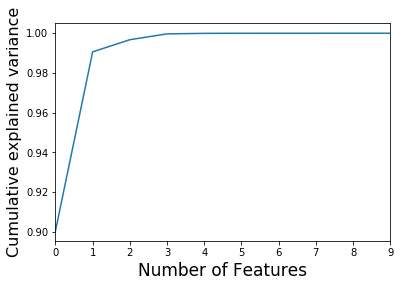

In [16]:
from sklearn.decomposition import PCA 

pca = PCA().fit(train_x)
var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,9,1)
plt.xlabel('Number of Features', fontsize=17)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

In [17]:
 #jj.smote_valid(model,train_eval_X, train_eval_Y)

In [18]:

model=jj.get_estimator (allure_etudier) 

In [19]:
model=jj.fit_estimator(model,train_x,train_y, test_x,test_y)



recherche par modele
2018-07-19 20:22:24.416840
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.07,
       max_delta_step=8, max_depth=7, max_features='sqrt',
       min_child_weight=2, missing=None, n_estimators=2430, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=1e-05, reg_lambda=3, scale_pos_weight=6, seed=1090,
       silent=False, subsample=1)
fit
FIN recherche par modele

 Time taken: 0 hours 1 minutes and 17.03 seconds.


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


>>>>>>>>>>  Accuracy: 84.585%
             precision    recall  f1-score   support

          0       0.95      0.87      0.91     36739
          1       0.29      0.54      0.38      3437

avg / total       0.90      0.85      0.87     40176




                           importance
feature                              
PAR_COTEDER                     0.057
p2018                           0.054
CHEVAL                          0.045
PAR_REUSSITE_GAGNE              0.042
Nb_partant                      0.039
PAR_PROPRIO                     0.034
PAR_JOC_ECART_PLACE             0.032
PAR_VICTOIRE                    0.032
PAR_NUM                         0.032
HIPPO                           0.031
PAR_AGE                         0.031
PAR_CARRIERE                    0.030
NOM_ENTR                        0.030
PAR_ENT_RAPPORT_GAGNANT_M       0.030
PAR_REUSSITE_3P                 0.029
PAR_ENT_ECART_PLACE             0.029
PAR_PLACE                       0.029
CORDE                           0.028
NOM_JOC                         0.028
PAR_RUESSITE_PLACE              0.028
pAR_JOC_RAPPORT_GAGNANT_M       0.028
PAR_ENT_NB_COURSE               0.027
POIDS                           0.026
pAR_JOC_REUSSITE_GAGNE          0.025
PAR_ENT_REU

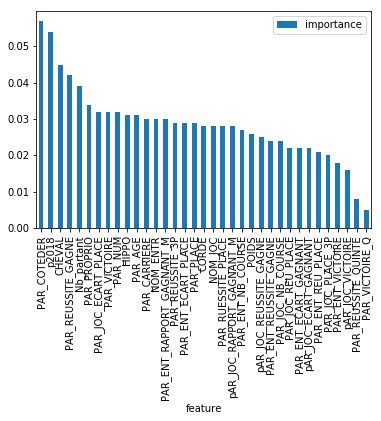

In [20]:
jj.plot_importance(feature_columns=feature_columns,model=model)


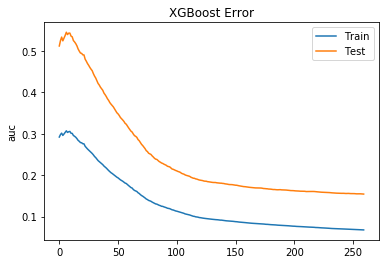

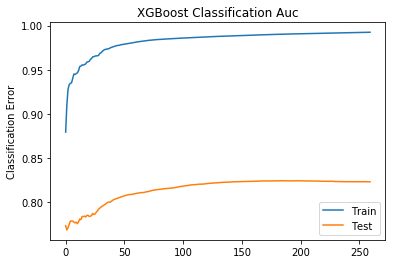

In [21]:

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

 # plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost Error')
pyplot.show()
        # plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Auc')
pyplot.show()


In [22]:
#jj.affiche_evalSet(model,train_x,train_y,test_x,test_y,1)


#jj.affiche_evalSet(mybest_model=model,set_train=train_x,set_train_cible=train_y,set_test=test_x,set_test_cible=test_y,type_eval=2)




In [23]:

df_numero_a_predire = jj.lecture_data('d:\data_jour.csv', xnames, ['IDPARTCIPANT', 'IDCOURSE'],allure=allure_etudier,avec_index=False)

print("Fichier lu d:\data_jour.csv" )
df_numero_a_predire = df_numero_a_predire.groupby("ALLURE")
df_numero_a_predire = df_numero_a_predire.get_group(allure_etudier)


#calcul des point p2018 pour la journée 

df2_journee=jj.calcul_les_notes(df=df_numero_a_predire,allure=allure_etudier)

#df2_journee = jj.encodage(df2_journee)

#suppression de quelques colonnnes
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=0)
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=allure_etudier)

df2_journee['SELECTION'] = 0

    


Fichier lu d:\data_jour.csv
2018-07-19 20:23:43.102452

 Time taken: 0 hours 0 minutes and 0.0 seconds.
    print(N°  0 None
Suppression colonnne  0
Suppression colonnne  2


In [24]:

df2_journee=df2_journee.set_index( ['IDPARTCIPANT', 'IDCOURSE'])




                


In [25]:
train_x, test_x, train_y, test_y = jj.split_dataset(df2_journee, 0, feature_columns, response_column)

    
test_x.head(10)    

,,HIPPO,PAR_AGE,PAR_CARRIERE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,...,NOM_JOC,NOM_ENTR,POIDS,CORDE,CHEVAL,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,p2018
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,,,
1230967,99321,114,3,13.0,16,16,6.30,0.24,0.06,16.0,13,...,174,663,56,7,12865,3,1.0,0,262.0,161.191802
1230921,99318,114,2,3.0,18,5,10.85,0.27,0.07,27.0,12,...,634,677,56,3,110224,0,0.0,0,339.0,99.708519
1230922,99318,114,2,1.0,17,7,3.55,0.32,0.12,9.0,13,...,2458,2659,56,16,121288,1,0.0,0,73.0,88.360280
1231005,99325,86,6,35.0,24,0,24.65,0.13,0.05,4.0,1,...,163,2527,59,3,34046,0,3.0,0,68.0,132.137906
1231023,99327,86,10,77.0,3,2,10.81,0.22,0.07,10.0,1,...,10581,195,67,4,285,2,10.0,1,131.0,230.331440
1230944,99320,114,5,30.0,10,7,11.56,0.45,0.16,5.0,5,...,3342,7134,58,12,4159,1,3.0,0,31.0,159.997560
1231001,99324,86,5,18.0,14,9,11.95,0.21,0.04,4.0,8,...,9153,669,52,5,18746,9,2.0,0,82.0,117.951463
1230970,99321,114,3,3.0,31,9,5.07,0.32,0.09,13.0,39,...,231,660,54,3,120956,2,0.0,0,140.0,85.499239
1230975,99322,86,2,5.0,8,3,7.80,0.36,0.09,16.0,3,...,154,166,55,3,100359,0,1.0,0,163.0,179.146591


In [26]:



test_y = test_y['SELECTION'].ravel()
y_pred = model.predict(test_x)
y_pred

df_pred = pd.DataFrame.from_dict(y_pred)
test_copy = test_x.copy() #################
PROBA = model.predict_proba(test_x)

df_proba = pd.DataFrame.from_dict(PROBA)    
df_final = pd.concat([df_proba, df_pred], axis=1)
df_final.head(10)

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1,0
0,0.804072,0.195928,0
1,0.970258,0.029742,0
2,0.977664,0.022336,0
3,0.675965,0.324035,0
4,0.384152,0.615848,1
5,0.755589,0.244411,0
6,0.532597,0.467403,0
7,0.988432,0.011568,0
8,0.753508,0.246492,0
9,0.665811,0.334189,0


In [27]:
test_x = jj.drop_test(test_copy)

In [28]:
test_y = jj.copie_data(test_x=test_x, df_proba=df_proba,allure_etudier=allure_etudier)



2018-07-19 20:23:46.348771
Nomnre de lignes = 171
 FORMATION DU FICHIER pour  2

 Time taken: 0 hours 0 minutes and 21.46 seconds.
Fin copie


In [29]:

jj.ecrire_pour_diabolo(test_x=test_y,allure_etudier=allure_etudier)



 fin de copie sur Test_x                              v0        v1  sel
IDPARTCIPANT IDCOURSE                         
1230967      99321     0.804072  0.195928    0
1230921      99318     0.970258  0.029742    0
1230922      99318     0.977664  0.022336    0
1231005      99325     0.675965  0.324035    0
1231023      99327     0.384152  0.615848    0
1230944      99320     0.755589  0.244411    0
1231001      99324     0.532597  0.467403    0
1230970      99321     0.988432  0.011568    0
1230975      99322     0.753508  0.246492    0
1230974      99322     0.665811  0.334189    0
1231028      99328     0.107763  0.892237    0
1231003      99325     0.780188  0.219812    0
1230917      99318     0.920876  0.079124    0
1230881      99315     0.804181  0.195819    0
1230911      99318     0.961668  0.038332    0
1230895      99316     0.979834  0.020166    0
1230935      99319     0.714279  0.285721    0
1230896      99316     0.861028  0.138972    0
1231006      99325     0.768463  